<a href="https://colab.research.google.com/github/zuzanadostalova/Tutorials/blob/master/3)_Practical_assignment_minimal_distance_head_to_head_plot_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment**:

Count the head to head (5' end to 5' end) distance between reads in the BED file containing FUS gene from Homo sapiens K562 (https://www.encodeproject.org/files/ENCFF861KMV/). Plot the distribution of the distances between reads.

> I. Download the BED file, unzip it.

> II. Sort it in an ascending order by the chromosome name and the start coordinate.

> III. Create a dictionary with reads separated into those on the plus and those on the minus strand. 

> IV. Create a dictionary with the chromosomes, strands, and the smallest head to head distance between the reads.

> V. Create a dataframe.

> VI. Plot the distribution of the minimal distance between the reads.

**Note**: BED file is a zero-based and half-open coordinate system; the index counting starts from 0 and the last index of the chromosome end is excluded.

Read more at:
[UCSC](http://genome.ucsc.edu/blog/the-ucsc-genome-browser-coordinate-counting-systems/) | 
[link1](https://plastid.readthedocs.io/en/latest/concepts/coordinates.html#start-end) | 
[link2](https://arnaudceol.wordpress.com/2014/09/18/chromosome-coordinate-systems-0-based-1-based/)

# **Distribution of the head to head distance between reads.**

## I. Download the BED file. 

Define a function that downloads and saves  BED file from URL.

In [82]:
# Import get and decompress functions which you will need for the BED reader function.
from requests import get
from gzip import decompress

# Define a function that will download the compressed (gz) BED file,
# and it will decompress it to text.
# Helper function get_gzipped_bed_ is inside the main bed_reader function.
def bed_reader(target_url, output_name):
  def get_gzipped_bed_(target_url):
    downloaded_bed = get(target_url).content
    decompressed_bed = decompress(downloaded_bed)
    bed_file_human_readable = decompressed_bed.decode()
    return bed_file_human_readable
  bed_file = get_gzipped_bed_(target_url)
  # Create a file python object (f) on the virtual machine disk as output_name. 
  # Inside this empty f write the content of your bed_file variable.
  with open(output_name, "w") as f:
    f.write(bed_file)
  
  return output_name

# Call the outer function and pass two arguments into it - url and arbitrary 
# output name.
local_bed_file = bed_reader("https://www.encodeproject.org/files/ENCFF861KMV/@@download/ENCFF861KMV.bed.gz", 
           "ENCFF861KMV.bed")
# Your bed file.
print("BED file saved as:", local_bed_file)

BED file saved as: ENCFF861KMV.bed


## II. Sort the BED file. 

Sort the BED file in the ascending order by the chromosome name and the start coordinate. You have three options - you can use either A) Unix system call, B) Pandas, or C) Pybed tools.

###**A. Unix system call.**

In [83]:
# Sort out the BED file by the first column (chromosome name) -k1 and the second 
# column (start coordinate) -k2. n argument specifies sorting in numeric order.
# Save the sorted content in a new file. 
!sort -k1,1 -k2,2n ENCFF861KMV.bed > ENCFF861KMV.sorted.bed

# show first n == 10 lines of sorted bed file
!head -n 10 ENCFF861KMV.sorted.bed

chr1	632546	632615	FUS_K562_IDR	1000	+	3.82686687508738	6.50783294676379	-1	-1
chr1	965337	965476	FUS_K562_IDR	1000	+	3.12362327712992	3.53719425627146	-1	-1
chr1	1035440	1035512	FUS_K562_IDR	1000	+	3.18112338442576	3.83337927656262	-1	-1
chr1	1035894	1035948	FUS_K562_IDR	1000	+	3.73779412096374	3.59568021751587	-1	-1
chr1	1035967	1036051	FUS_K562_IDR	1000	+	3.18200361335799	6.044609576236	-1	-1
chr1	1036331	1036425	FUS_K562_IDR	1000	+	3.5903003449292	6.29667912525784	-1	-1
chr1	1036540	1036620	FUS_K562_IDR	1000	+	3.23250781628894	4.57625554730423	-1	-1
chr1	1036926	1036982	FUS_K562_IDR	1000	+	3.79964298307618	3.18534281531791	-1	-1
chr1	1037116	1037181	FUS_K562_IDR	1000	+	3.27222505003613	4.18593355349903	-1	-1
chr1	1037598	1037673	FUS_K562_IDR	1000	+	3.44942312400564	5.14061189005205	-1	-1


###**B. Convert BED file to Pandas dataframe.**

In [0]:
# Use pandas.DataFrame.sort_values(by=["chrom", "start"]).
import pandas as pd

# Create a pandas dataframe. Specify different type of arguments separator, 
# and names of the columns.
dataframe = pd.read_csv(
    local_bed_file, sep="\t", 
    names=[
    "chrom_name", "start", "end", "name", "score", "strand", "7", "8", "9", "10"]
    )

# Sort the dataframe by chromosome name and start coordinate. If inplace=False,
# return a new dataframe.
dataframe.sort_values(by=["chrom_name", "start"], inplace=True)

Alternatively, you could download and decompress the BED file directly from the url.

In [0]:
# Use pandas.DataFrame.sort_values(by=["chrom", "start"]).
import pandas as pd

# Specify the target URL.
target_url = ("https://www.encodeproject.org/files/ENCFF861KMV/" +
              "@@download/ENCFF861KMV.bed.gz")

# Create a pandas dataframe. Specify different type of arguments - url, decompression,
# separator, and names of the columns.
# Pandas can read csv and decompress a file from url. 
dataframe = pd.read_csv(
    target_url, compression="gzip", sep="\t", 
    names=[
    "chrom_name", "start", "end", "name", "score", "strand", "7", "8", "9", "10"]
    )

# Sort the dataframe by chromosome name and start coordinate. If inplace=False,
# return a new dataframe.
dataframe.sort_values(by=["chrom_name", "start"], inplace=True)

###**C. Use pybedtools.**

pybedtools wraps and extends [BEDTools](https://bedtools.readthedocs.io/en/latest/) and offers feature-level manipulations from within Python.

pybed tools documentation avalaible at [pybed tools](https://daler.github.io/pybedtools/index.html). First you need to install and set up pybedtools. You will use pybedtools.bedtool.BedTool.sort.

In [86]:
# Install bedtools, check if bedtools are installed, and install pybedtools.
! apt-get install bedtools
! bedtools --version
! pip install pybedtools

Reading package lists... Done
Building dependency tree       
Reading state information... Done
bedtools is already the newest version (2.26.0+dfsg-5).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.
bedtools v2.26.0


In [0]:
# In case you have problems with the installation, you can first remove bedtools 
# and pybedtools so you can reinstall them again. 

# Skip this cell if bedtools and pybedtools installed and working!!!
#! apt-get remove  bedtools
#! pip uninstall pybedtools
#! pip uninstall bedtools

Use the installed pybedtools package to sort the BED file.

In [0]:
# Import pybedtools, from pybedtools import BedTool. Create a BedTool file object
# from local_bed_file, store it in input_file. Sort the input file and save the
# result in i variable.
import pybedtools
from pybedtools import BedTool
input_file = pybedtools.BedTool(local_bed_file)
i = input_file.sort()

## III. Create a dictionary with reads separated by strand.

`{chrom_name : { strand : 5'-coordinate }}`

###**A. Unix system call.**

In [0]:
# Create an empty dictionary. 
dict_r_unix = {}
# Open sorted BED file.
with open("ENCFF861KMV.sorted.bed", "r") as text:
  # Read the content line by line.
  for line in text.readlines():
    # Define column, chrom_name, start, end, and strand.
    column = line.strip().split("\t")
    chrom_name = column[0]
    start = int(column[1])
    end = int(column[2])
    strand = column[5]
    # If the chromosome name exists in the dictionary already,
    # put the strand inside without creating a new dictionary
    # with the same chromosome name.
    if chrom_name in dict_r_unix:
      # If the dictionary strand already exists in the dictionary 
      # chromosome name, put the end/start inside it without creating
      # a new strand key.
      if strand in dict_r_unix[chrom_name]:
        # In case of the plus strand, append start coordinate to the list where 
        # is the 5' end (head).
        if strand == "+":
          dict_r_unix[chrom_name][strand].append(start) 
        # If the strand is minus, append end to the list,
        # the reason being that minus strand is in reversed
        # order - end coordinate is the 5' end (head).
        else:
          dict_r_unix[chrom_name][strand].append(end)
      # If the strand does not yet exist in
      # the chromosome name dictionary, create it and create a list inside.
      else:
        dict_r_unix[chrom_name][strand] = []
        # To fill the new strand dictionary,
        # you need to provide also the code for strand dictionary
        # creation, the +/- key, and the end/start coordinates
        # inside the list.
        if strand == "+":
          dict_r_unix[chrom_name][strand].append(start) 
        else:
          dict_r_unix[chrom_name][strand].append(end)
    # If the chromosome name is not yet in the dictionary, 
    # create it.
    else:
      # Create a new dictionary inside the chromosome name
      # dictionary.
      dict_r_unix[chrom_name] = {}
      # To fill the new chrom_name dictionary, you need to 
      # provide also the code for strand dictionary
      # creation, the +/- key, and the end/start coordinates
      # inside the list.
      # The key of this dictionary is strand and the value
      # is a new list.
      dict_r_unix[chrom_name][strand] = []
      # If the strand is plus, append start to the list.
      if strand == "+":
        dict_r_unix[chrom_name][strand].append(start) 
      # If the strand is minus, append end to the list.
      else:
        dict_r_unix[chrom_name][strand].append(end)

#print(dict_r_unix) # Printing the dictionary with reads.

###**B. Pandas option.**

In [0]:
# Import defaultdict from collections. The advantage of defaultdict is that
# even if it is empty, it does not raise a key error. This way, you avoid repeating 
# if..., else... conditions upon creation of chrom_name and strand keys.
from collections import defaultdict

# Create an empty defaultdict dictionary.
dict_r_pandas = defaultdict(dict)

# Group the chromosome name and strand together in group_name.
# Iterate over the group name and group in the dataframe. 
for group_name, group in dataframe.groupby(['chrom_name', 'strand']):
  chrom_name, strand = group_name
  # If the strand is plus, add start to the list in the dictionary.
  if strand == "+":
    reads = group.start.tolist()
  else:
    # If the strand is minus, add end to the list in the dictionary.
    reads = group.end.tolist()
  # Create a chrom_name dictionary inside the dict_r_pandas dictionary, and
  # put inside a strand as the key and reads as the value.
  dict_r_pandas[chrom_name][strand] = reads

# print(dict_r_pandas) # Printing the dictionary with reads.

###**C. Pybedtools option.**

In [0]:
# Create an empty dictionary. 
dict_r_pybed = {}
# Open sorted BED file.
with open(i.fn, "r") as text:
  # Read the content line by line.
  for line in text.readlines():
    # Define column, chrom_name, start, end, and strand.
    column = line.strip().split("\t")
    chrom_name = column[0]
    start = int(column[1])
    end = int(column[2])
    strand = column[5]
    # If the chromosome name exists in the dictionary already,
    # put the strand inside it without creating a new dictionary
    # with the same chromosome name.
    if chrom_name in dict_r_pybed:
      # If the dictionary strand already exists in the dictionary 
      # chromosome name, put the end/start inside without creating
      # a new strand key.
      if strand in dict_r_pybed[chrom_name]:
        # In case of the plus strand, append start coordinate to the list where 
        # is the 5' end (head).
        if strand == "+":
          dict_r_pybed[chrom_name][strand].append(start) 
        # If the strand is minus, append end to the list,
        # the reason being that minus strand is in reversed
        # order - start coordinate is the 5' end (head).
        else:
          dict_r_pybed[chrom_name][strand].append(end)
      # If the strand does not yet exist in
      # the chromosome name dictionary, create it and create a list inside.
      else:
        dict_r_pybed[chrom_name][strand] = []
        # To fill the new strand dictionary,
        # you need to provide also the code for strand dictionary
        # creation, the +/- key, and the end/start coordinates
        # inside the list.
        if strand == "+":
          dict_r_pybed[chrom_name][strand].append(start) 
        else:
          dict_r_pybed[chrom_name][strand].append(end)
    # If the chromosome name is not yet in the dictionary, 
    # create it.
    else:
      # Create a new dictionary inside the chromosome name
      # dictionary.
      dict_r_pybed[chrom_name] = {}
      # To fill the new chrom_name dictionary, you need to 
      # provide also the code for strand dictionary
      # creation, the +/- key, and the end/start coordinates
      # inside the list.
      # The key of this dictionary is strand and the value
      # is a new list.
      dict_r_pybed[chrom_name][strand] = []
      # If the strand is plus, append start to the list.
      if strand == "+":
        dict_r_pybed[chrom_name][strand].append(start) 
      # If the strand is minus, append end to the list.
      else:
        dict_r_pybed[chrom_name][strand].append(end)

# print(dict_r_pybed) # Printing the dictionary with reads.

## IV. Create a dictionary with the closest distances without outliers.

Note: Consider the distance between start/end coordinate and its neighbors both on the right and on the left side. 

For example, your coordinates are: 5, 20, 28. 
Your start coordinate position is 20, its left neighbor is 5, its right neigbor is 18.

20 - 5 = 15
28 - 20 = 8

28 is closer to 20, so add 28 to the dictionary of closest distances.

Process with end coordinates on the minus strand.

To exclude the outliers from the dictionary of distances, you need to compare the distance between the absolute value of the currently investigated number to the absolute value of the previous number. Subsequently, you need to also compare the absolute value of the currently investigated number to the absolute value of the next number. Add to the dictionary of closest distances either the previous or the next number based on whichever of the said distances is smaller.

###**A. Unix system call.**

In [0]:
dict_clos_unix = {}
# For each chromosome in the dictionary of distance create a chrom_name in the new
# dictionary of the closest distances. Simultaneously, the lists for the plus
# and for the minus strand will be created as explained above.
for chrom_name in dict_r_unix:
  dict_clos_unix[chrom_name] = {"+" : list(), "-" : list()}
  for strand in dict_r_unix[chrom_name]:
    if strand == "+":
      for dist_start in range(1,len(dict_r_unix[chrom_name][strand]) - 1): 
        # This time, you need to compare the distance between the current
        # position and the next one with the distance between the current
        # position and the previous one. Whichever is closer will be put
        # to the dictionary.
        this_start_pos = dict_r_unix[chrom_name][strand][dist_start]
        right_start_neigh = dict_r_unix[chrom_name][strand][dist_start+1]          
        left_start_neigh = dict_r_unix[chrom_name][strand][dist_start-1]    
        dist1 = this_start_pos - left_start_neigh 
        dist2 = right_start_neigh - this_start_pos    
        if dist1 < dist2:
          dict_clos_unix[chrom_name][strand].append(dist1)
        else:
          dict_clos_unix[chrom_name][strand].append(dist2)
    else:
          # Compare the distance between the current
          # position and the next one with the distance between the current
          # position and the previous one. Whichever is closer will be put
          # to the dictionary.
      for dist_end in range(1,len(dict_r_unix[chrom_name][strand]) - 1): 
        this_end_pos = dict_r_unix[chrom_name][strand][dist_end]
        right_end_neigh = dict_r_unix[chrom_name][strand][dist_end+1]          
        left_end_neigh = dict_r_unix[chrom_name][strand][dist_end-1]    
        dist1 = this_end_pos - left_end_neigh    
        dist2 = right_end_neigh - this_end_pos    
        if dist1 < dist2:
          dict_clos_unix[chrom_name][strand].append(dist1)
        else:
          dict_clos_unix[chrom_name][strand].append(dist2)


# print(dict_r_unix) # Printing the dictionary with the distance 
# between reads. 
# print(dict_clos_unix)# Printing the dictionary with the closest distance 
# between reads. 

To be sure you got rid of all of the outliers, count z-score to determine the  relationship of each value to the mean of a group of values. Set an arbitrary threshold to filter values that are distant from the mean.

In [93]:
from scipy import stats
import numpy as np

dict_no_outliers_unix = {}

# Only chrom_name key.
for chrom_name in dict_clos_unix.keys():
  # Plus and minus strand are manually written.
  list_plus_input = dict_clos_unix[chrom_name]['+']
  list_minus_input = dict_clos_unix[chrom_name]['-']
  # get a zscore for list_plus_input
  zscore_plus = stats.zscore(list_plus_input, ddof=0)
  # doo the same foor minus strand
  zscore_minus = stats.zscore(list_minus_input, ddof=0)

  if len(list_plus_input) > 0:
    for z, distance in zip(zscore_plus, list_plus_input):
      if z < 1:
        if chrom_name in dict_no_outliers_unix:
          if "+" in dict_no_outliers_unix[chrom_name]:
            dict_no_outliers_unix[chrom_name]["+"].append(distance)
          
          else:
            dict_no_outliers_unix[chrom_name]["+"] = []
            dict_no_outliers_unix[chrom_name]["+"].append(distance)

        else:
          dict_no_outliers_unix[chrom_name] = {}
          dict_no_outliers_unix[chrom_name]["+"] = []
          dict_no_outliers_unix[chrom_name]["+"].append(distance)

  if len(list_minus_input)  > 0:
    for z, distance in zip(zscore_minus, list_minus_input):
      if z < 1:
        if chrom_name in dict_no_outliers_unix:
          if "-" in dict_no_outliers_unix[chrom_name]:
            dict_no_outliers_unix[chrom_name]["-"].append(distance)
          
          else:
            dict_no_outliers_unix[chrom_name]["-"] = []
            dict_no_outliers_unix[chrom_name]["-"].append(distance)

        else:
          dict_no_outliers_unix[chrom_name] = {}
          dict_no_outliers_unix[chrom_name]["-"] = []
          dict_no_outliers_unix[chrom_name]["-"].append(distance)

  # loop over the two lists and remove outliers
  # you can also use an array
  
# print(dict_no_outliers_unix) # Printing the dictionary with 
# no outliers.

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:2416: RuntimeWarning: Mean of empty slice.
  mns = a.mean(axis=axis, keepdims=True)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:207: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


To compare the graphs before applying z-score filtering and afterwards. You can see that graph after the filtering are rid of outlying values.

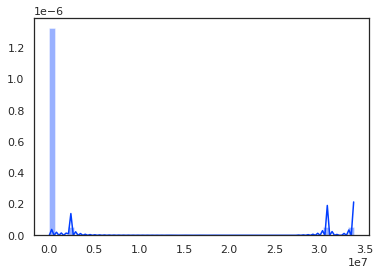

In [94]:
import seaborn as sns
sns.distplot(a=dict_clos_unix[chrom_name]["+"])

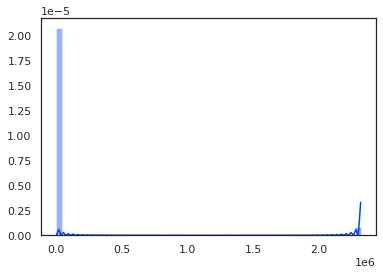

In [95]:
import seaborn as sns
sns.distplot(a=dict_no_outliers_unix[chrom_name]["+"])

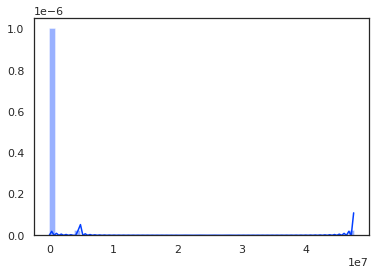

In [96]:
import seaborn as sns
sns.distplot(a=dict_clos_unix[chrom_name]["-"])

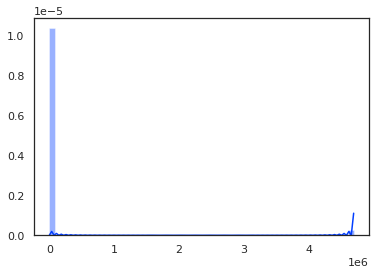

In [97]:
import seaborn as sns
sns.distplot(a=dict_no_outliers_unix[chrom_name]["-"])

###**B. Pandas option.**

In [0]:
dict_clos_pandas = {}
# For each chromosome in the dictionary of distance create a chrom_name in the new
# dictionary of the closest distances. Simultaneously, the lists for the plus
# and for the minus strand will be created as explained above.
for chrom_name in dict_r_pandas:
  dict_clos_pandas[chrom_name] = {"+" : list(), "-" : list()}
  for strand in dict_r_pandas[chrom_name]:
    if strand == "+":
      for dist_start in range(1,len(dict_r_pandas[chrom_name][strand]) - 1): 
        # This time, you need to compare the distance between the current
        # position and the next one with the distance between the current
        # position and the previous one. Whichever is closer will be put
        # to the dictionary.
        this_start_pos = dict_r_pandas[chrom_name][strand][dist_start]
        right_start_neigh = dict_r_pandas[chrom_name][strand][dist_start+1]          
        left_start_neigh = dict_r_pandas[chrom_name][strand][dist_start-1]    
        dist1 = this_start_pos - left_start_neigh 
        dist2 = right_start_neigh - this_start_pos    
        if dist1 < dist2:
          dict_clos_pandas[chrom_name][strand].append(dist1)
        else:
          dict_clos_pandas[chrom_name][strand].append(dist2)
    else:
          # Compare the distance between the current
          # position and the next one with the distance between the current
          # position and the previous one. Whichever is closer will be put
          # to the dictionary.
      for dist_end in range(1,len(dict_r_pandas[chrom_name][strand]) - 1): 
        this_end_pos = dict_r_pandas[chrom_name][strand][dist_end]
        right_end_neigh = dict_r_pandas[chrom_name][strand][dist_end+1]          
        left_end_neigh = dict_r_pandas[chrom_name][strand][dist_end-1]    
        dist1 = this_end_pos - left_end_neigh    
        dist2 = right_end_neigh - this_end_pos    
        if dist1 < dist2:
          dict_clos_pandas[chrom_name][strand].append(dist1)
        else:
          dict_clos_pandas[chrom_name][strand].append(dist2)


#print(dict_r_pandas) # Printing the dictionary with the distance 
# between reads. 
#print(dict_clos_pandas) # Printing the dictionary with the closest distance 
# between reads. 

To be sure you got rid of all of the outliers, count z-score to determine the  relationship of each value to the mean of a group of values. Set an arbitrary threshold to filter values that are distant from the mean.

In [99]:
from scipy import stats
import numpy as np

dict_no_outliers_pandas = {}

# Only chrom_name key.
for chrom_name in dict_clos_pandas.keys():
  # Plus and minus strand are manually written.
  list_plus_input = dict_clos_pandas[chrom_name]['+']
  list_minus_input = dict_clos_pandas[chrom_name]['-']
  # get a zscore for list_plus_input
  zscore_plus = stats.zscore(list_plus_input, ddof=0)
  # doo the same foor minus strand
  zscore_minus = stats.zscore(list_minus_input, ddof=0)

  if len(list_plus_input) > 0:
    for z, distance in zip(zscore_plus, list_plus_input):
      if z < 1:
        if chrom_name in dict_no_outliers_pandas:
          if "+" in dict_no_outliers_pandas[chrom_name]:
            dict_no_outliers_pandas[chrom_name]["+"].append(distance)
          
          else:
            dict_no_outliers_pandas[chrom_name]["+"] = []
            dict_no_outliers_pandas[chrom_name]["+"].append(distance)

        else:
          dict_no_outliers_pandas[chrom_name] = {}
          dict_no_outliers_pandas[chrom_name]["+"] = []
          dict_no_outliers_pandas[chrom_name]["+"].append(distance)

  if len(list_minus_input)  > 0:
    for z, distance in zip(zscore_minus, list_minus_input):
      if z < 1:
        if chrom_name in dict_no_outliers_pandas:
          if "-" in dict_no_outliers_pandas[chrom_name]:
            dict_no_outliers_pandas[chrom_name]["-"].append(distance)
          
          else:
            dict_no_outliers_pandas[chrom_name]["-"] = []
            dict_no_outliers_pandas[chrom_name]["-"].append(distance)

        else:
          dict_no_outliers_pandas[chrom_name] = {}
          dict_no_outliers_pandas[chrom_name]["-"] = []
          dict_no_outliers_pandas[chrom_name]["-"].append(distance)

  # loop over the two lists and remove outliers
  # you can also use an array
  
# print(dict_no_outliers_pandas) # Printing the dictionary with no outliers.

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:2416: RuntimeWarning: Mean of empty slice.
  mns = a.mean(axis=axis, keepdims=True)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:207: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


###**C. Pybedtools option.**

In [0]:
dict_clos_pybed = {}
# For each chromosome in the dictionary of distance create a chrom_name in the new
# dictionary of the closest distances. Simultaneously, the lists for the plus
# and for the minus strand will be created as explained above.
for chrom_name in dict_r_pybed:
  dict_clos_pybed[chrom_name] = {"+" : list(), "-" : list()}
  for strand in dict_r_pybed[chrom_name]:
    if strand == "+":
      for dist_start in range(1,len(dict_r_pybed[chrom_name][strand]) - 1): 
        # This time, you need to compare the distance between the current
        # position and the next one with the distance between the current
        # position and the previous one. Whichever is closer will be put
        # to the dictionary.
        this_start_pos = dict_r_pybed[chrom_name][strand][dist_start]
        right_start_neigh = dict_r_pybed[chrom_name][strand][dist_start+1]          
        left_start_neigh = dict_r_pybed[chrom_name][strand][dist_start-1]    
        dist1 = this_start_pos - left_start_neigh 
        dist2 = right_start_neigh - this_start_pos    
        if dist1 < dist2:
          dict_clos_pybed[chrom_name][strand].append(dist1)
        else:
          dict_clos_pybed[chrom_name][strand].append(dist2)
    else:
          # Compare the distance between the current
          # position and the next one with the distance between the current
          # position and the previous one. Whichever is closer will be put
          # to the dictionary.
      for dist_end in range(1,len(dict_r_pybed[chrom_name][strand]) - 1): 
        this_end_pos = dict_r_pybed[chrom_name][strand][dist_end]
        right_end_neigh = dict_r_pybed[chrom_name][strand][dist_end+1]          
        left_end_neigh = dict_r_pybed[chrom_name][strand][dist_end-1]    
        dist1 = this_end_pos - left_end_neigh    
        dist2 = right_end_neigh - this_end_pos    
        if dist1 < dist2:
          dict_clos_pybed[chrom_name][strand].append(dist1)
        else:
          dict_clos_pybed[chrom_name][strand].append(dist2)


#print(dict_r_pybed) # Printing the dictionary with the distance 
# between reads. 
#print(dict_clos_pybed) # Printing the dictionary with the closest distance 
# between reads. 

To be sure you got rid of all of the outliers, count z-score to determine the  relationship of each value to the mean of a group of values. Set an arbitrary threshold to filter values that are distant from the mean.

In [101]:
from scipy import stats
import numpy as np

dict_no_outliers_pybed = {}

# Only chrom_name key.
for chrom_name in dict_clos_pybed.keys():
  # Plus and minus strand are manually written.
  list_plus_input = dict_clos_pybed[chrom_name]['+']
  list_minus_input = dict_clos_pybed[chrom_name]['-']
  # get a zscore for list_plus_input
  zscore_plus = stats.zscore(list_plus_input, ddof=0)
  # doo the same foor minus strand
  zscore_minus = stats.zscore(list_minus_input, ddof=0)

  if len(list_plus_input) > 0:
    for z, distance in zip(zscore_plus, list_plus_input):
      if z < 1:
        if chrom_name in dict_no_outliers_pybed:
          if "+" in dict_no_outliers_pybed[chrom_name]:
            dict_no_outliers_pybed[chrom_name]["+"].append(distance)
          
          else:
            dict_no_outliers_pybed[chrom_name]["+"] = []
            dict_no_outliers_pybed[chrom_name]["+"].append(distance)

        else:
          dict_no_outliers_pybed[chrom_name] = {}
          dict_no_outliers_pybed[chrom_name]["+"] = []
          dict_no_outliers_pybed[chrom_name]["+"].append(distance)

  if len(list_minus_input)  > 0:
    for z, distance in zip(zscore_minus, list_minus_input):
      if z < 1:
        if chrom_name in dict_no_outliers_pybed:
          if "-" in dict_no_outliers_pybed[chrom_name]:
            dict_no_outliers_pybed[chrom_name]["-"].append(distance)
          
          else:
            dict_no_outliers_pybed[chrom_name]["-"] = []
            dict_no_outliers_pybed[chrom_name]["-"].append(distance)

        else:
          dict_no_outliers_pybed[chrom_name] = {}
          dict_no_outliers_pybed[chrom_name]["-"] = []
          dict_no_outliers_pybed[chrom_name]["-"].append(distance)

  # loop over the two lists and remove outliers
  # you can also use an array
  
#print(dict_no_outliers_pybed) # Printing the dictionary with no outliers.

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:2416: RuntimeWarning: Mean of empty slice.
  mns = a.mean(axis=axis, keepdims=True)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:207: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


## V. Plot the distribution of the closest distances without outliers between the reads.

1) To plot the data from the dictionary, you need to convert the dictionary into
dataframe. 

###**A. Unix command option.**

In [102]:
import pandas as pd
# Create an empty list.
list_unix_plus = list()
list_unix_min = list()
# Loop over the chromosome names in the dictionary. 
for chrom_name in dict_no_outliers_unix:
  # Create a temporary dictionary with the strands.
  dict_no_outliers_unix_tmp = dict_no_outliers_unix[chrom_name]
  # Loop over strands in the temporary dictionary.
  for strand in dict_no_outliers_unix_tmp:
    if strand == "+":
    # Define the distance.
      distance = dict_no_outliers_unix_tmp["+"]
    # Create a pandas daraframe with following columns:
    # distance, strand, and chromosome. 
      dict_unix_plus = pd.DataFrame(distance, columns=["distance"])
      dict_unix_plus["strand"] = "+"
      dict_unix_plus["chromosome"] = chrom_name
    # Append all of the dataframes from the temporary dictionary
    # to the list.
      list_unix_plus.append(dict_unix_plus)
    else:
      distance = dict_no_outliers_unix_tmp["-"]
    # Create a pandas daraframe with following columns:
    # distance, strand, and chromosome. 
      dict_unix_min = pd.DataFrame(distance, columns=["distance"])
      dict_unix_min["strand"] = "-"
      dict_unix_min["chromosome"] = chrom_name
    # Append all of the dataframes from the temporary dictionary
    # to the list.
      list_unix_min.append(dict_unix_min)

# You need to concatenate the list of dataframes into a new dataframe.    
df_unix_plus = pd.concat(list_unix_plus)
df_unix_minus = pd.concat(list_unix_min)
print(df_unix_plus)
print(df_unix_minus)
# Each column is a Pandas series.

    distance strand chromosome
0      70103      +       chr1
1        454      +       chr1
2         73      +       chr1
3         73      +       chr1
4        209      +       chr1
..       ...    ...        ...
22       381      +       chrX
23       381      +       chrX
24        51      +       chrX
25        51      +       chrX
26      9150      +       chrX

[2237 rows x 3 columns]
    distance strand chromosome
0      23153      -       chr1
1        258      -       chr1
2        116      -       chr1
3        116      -       chr1
4         40      -       chr1
..       ...    ...        ...
35     66310      -       chrX
36     66310      -       chrX
37   4695276      -       chrX
38     19680      -       chrX
39     19680      -       chrX

[1993 rows x 3 columns]


###**B. Pandas option.**

In [103]:
import pandas as pd
# Create an empty list.
list_pandas_plus = list()
list_pandas_min = list()
# Loop over the chromosome names in the dictionary. 
  # Create a temporary dictionary with the strands.
  # Loop over strands in the temporary dictionary.
for chrom_name in dict_no_outliers_pandas:
  dict_no_outliers_pandas_tmp = dict_no_outliers_pandas[chrom_name]
  for strand in dict_no_outliers_pandas_tmp:
    if strand == "+":
    # Define the distance.
      distance = dict_no_outliers_pandas_tmp[strand]
    # Create a pandas daraframe with following columns:
    # distance, strand, and chromosome. 
      dict_pandas_plus = pd.DataFrame(distance, columns=["distance"])
      dict_pandas_plus["strand"] = strand
      dict_pandas_plus["chromosome"] = chrom_name
    # Append all of the dataframes from the temporary dictionary
    # to the list.
      list_pandas_plus.append(dict_pandas_plus)
    else:
      distance = dict_no_outliers_pandas_tmp[strand]
    # Create a pandas daraframe with following columns:
    # distance, strand, and chromosome. 
      dict_pandas_min = pd.DataFrame(distance, columns=["distance"])
      dict_pandas_min["strand"] = strand
      dict_pandas_min["chromosome"] = chrom_name
    # Append all of the dataframes from the temporary dictionary
    # to the list.
      list_pandas_min.append(dict_pandas_min)

# You need to concatenate the list of dataframes into a new dataframe.    
df_pandas_plus = pd.concat(list_pandas_plus)
df_pandas_minus = pd.concat(list_pandas_min)
print(df_pandas_plus)
print(df_pandas_minus)
# Each column is a Pandas series.

    distance strand chromosome
0      70103      +       chr1
1        454      +       chr1
2         73      +       chr1
3         73      +       chr1
4        209      +       chr1
..       ...    ...        ...
22       381      +       chrX
23       381      +       chrX
24        51      +       chrX
25        51      +       chrX
26      9150      +       chrX

[2237 rows x 3 columns]
    distance strand chromosome
0      23153      -       chr1
1        258      -       chr1
2        116      -       chr1
3        116      -       chr1
4         40      -       chr1
..       ...    ...        ...
35     66310      -       chrX
36     66310      -       chrX
37   4695276      -       chrX
38     19680      -       chrX
39     19680      -       chrX

[1993 rows x 3 columns]


###**C. Pybedtools option.**

In [104]:
import pandas as pd
# Create an empty list.
list_pybed_plus = list()
list_pybed_min = list()
# Loop over the chromosome names in the dictionary. 
for chrom_name in dict_no_outliers_pybed:
  # Create a temporary dictionary with the strands.
  dict_no_outliers_pybed_tmp = dict_no_outliers_pybed[chrom_name]
  # Loop over strands in the temporary dictionary.
  for strand in dict_no_outliers_pybed_tmp:
    if strand == "+":
    # Define the distance.
      distance = dict_no_outliers_pybed_tmp[strand]
    # Create a pandas daraframe with following columns:
    # distance, strand, and chromosome. 
      dict_pybed_plus = pd.DataFrame(distance, columns=["distance"])
      dict_pybed_plus["strand"] = strand
      dict_pybed_plus["chromosome"] = chrom_name
    # Append all of the dataframes from the temporary dictionary
    # to the list.
      list_pybed_plus.append(dict_pybed_plus)
    else:
      distance = dict_no_outliers_pybed_tmp[strand]
    # Create a pandas daraframe with following columns:
    # distance, strand, and chromosome. 
      dict_pybed_min = pd.DataFrame(distance, columns=["distance"])
      dict_pybed_min["strand"] = strand
      dict_pybed_min["chromosome"] = chrom_name
    # Append all of the dataframes from the temporary dictionary
    # to the list.
      list_pybed_min.append(dict_pybed_min)

# You need to concatenate the list of dataframes into a new dataframe.    
df_pybed_plus = pd.concat(list_pybed_plus)
df_pybed_minus = pd.concat(list_pybed_min)
print(df_pybed_plus)
print(df_pybed_minus)
# Each column is a Pandas series.

    distance strand chromosome
0      70103      +       chr1
1        454      +       chr1
2         73      +       chr1
3         73      +       chr1
4        209      +       chr1
..       ...    ...        ...
22       381      +       chrX
23       381      +       chrX
24        51      +       chrX
25        51      +       chrX
26      9150      +       chrX

[2237 rows x 3 columns]
    distance strand chromosome
0      23153      -       chr1
1        258      -       chr1
2        116      -       chr1
3        116      -       chr1
4         40      -       chr1
..       ...    ...        ...
35     66310      -       chrX
36     66310      -       chrX
37   4695276      -       chrX
38     19680      -       chrX
39     19680      -       chrX

[1993 rows x 3 columns]


##2) Use barplot to display the distribution of closest distances.

###**A. Unix command option.**

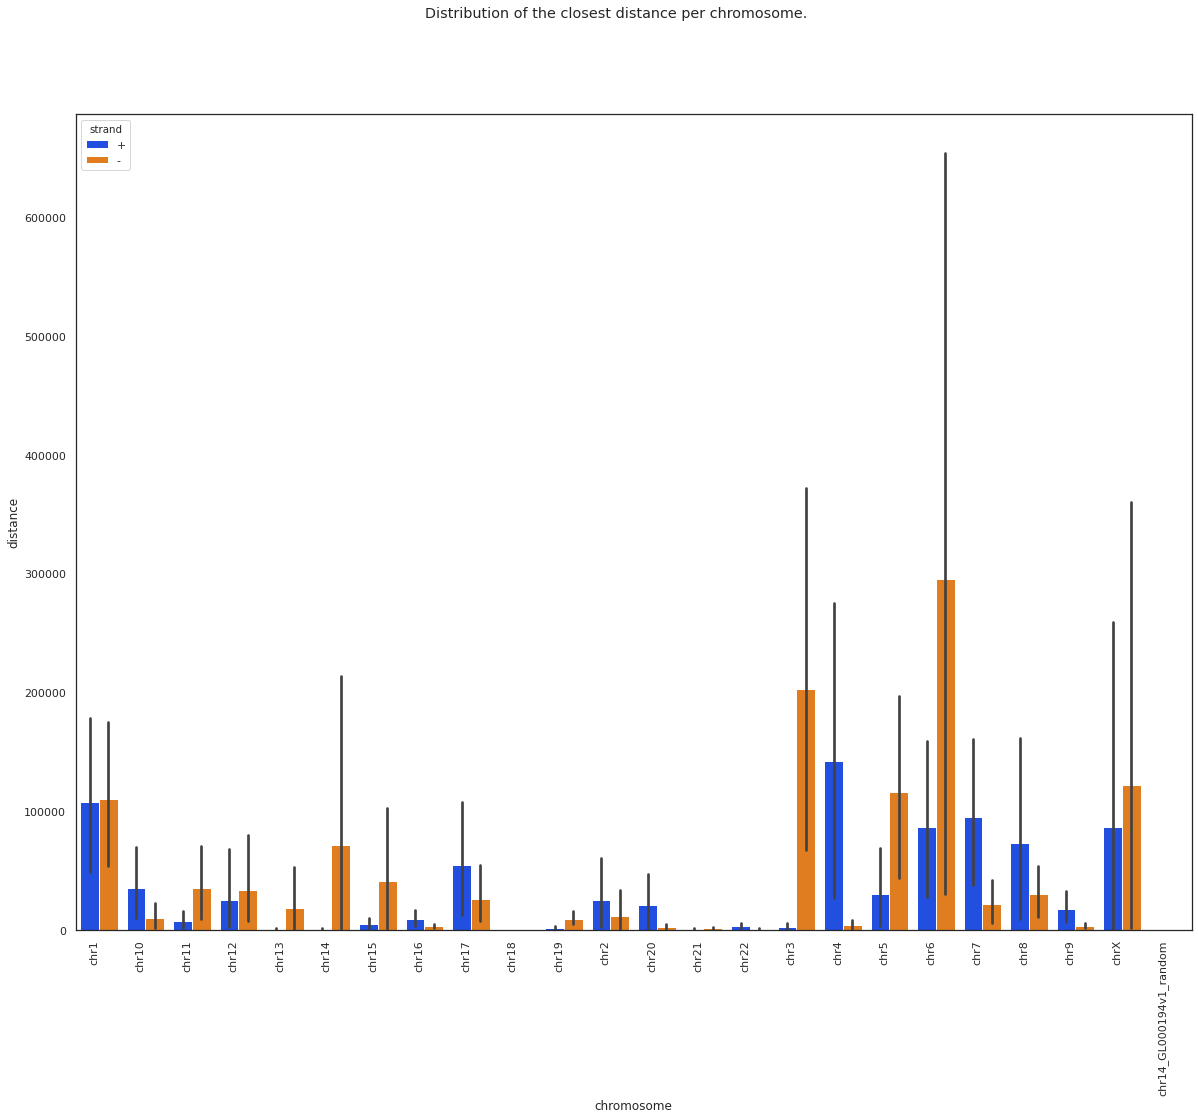

In [105]:
# Concatenate both dataframes into one.
import seaborn as sns
import matplotlib.pyplot as plt
df_unix_both = pd.concat([df_unix_plus, df_unix_minus])

sns.set(style="white", palette="bright", color_codes=True)

# Hue is parameter to distinguish different set of values with different colors.
# In your case, you distinguish plus and minus strand.
chart = sns.barplot(
      x='chromosome', y='distance', data=df_unix_both, hue='strand')

# You want to rotate the label by 90 degrees to fit them nicely under the plot.
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')

# Choose the title for the plot.
plt.suptitle("Distribution of the closest distance per chromosome.")

# Set the size of your plot.
plt.gcf().set_size_inches((20, 15))

###**B. Pandas option.**

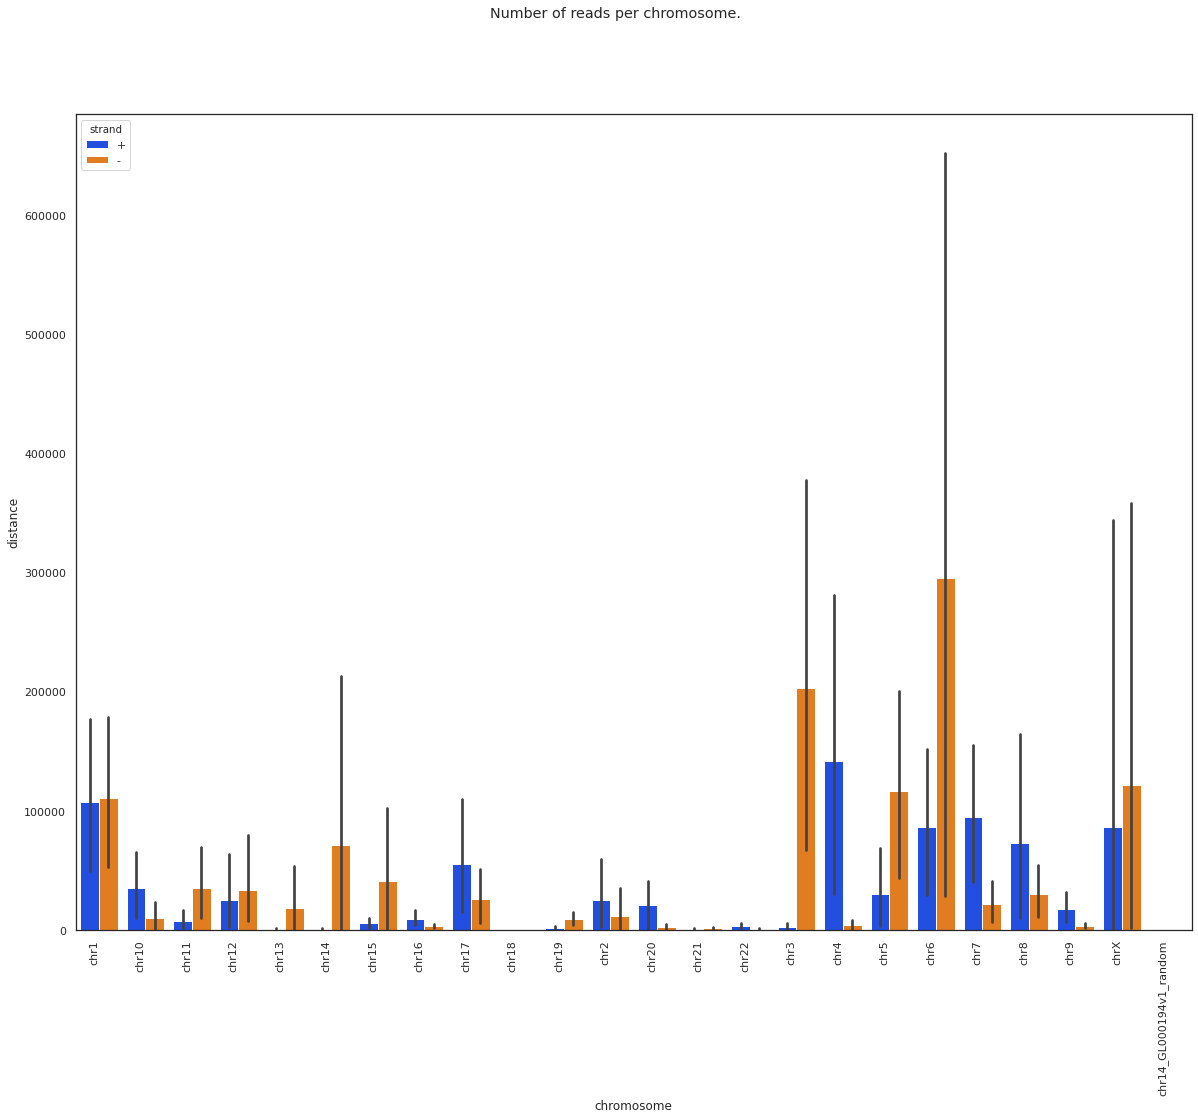

In [106]:
# Concatenate both dataframes into one.
df_pandas_both = pd.concat([df_pandas_plus, df_pandas_minus])

sns.set(style="white", palette="bright", color_codes=True)

# Hue is parameter to distinguish different set of values with different colors.
# In your case, you distinguish plus and minus strand.
chart = sns.barplot(
      x='chromosome', y='distance', data=df_pandas_both, hue='strand')

# You want to rotate the label by 90 degrees to fit them nicely under the plot.
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')

# Choose the title for the plot.
plt.suptitle("Number of reads per chromosome.")

# Set the size of your plot.
plt.gcf().set_size_inches((20, 15))

###**C. Pybedtools option.**

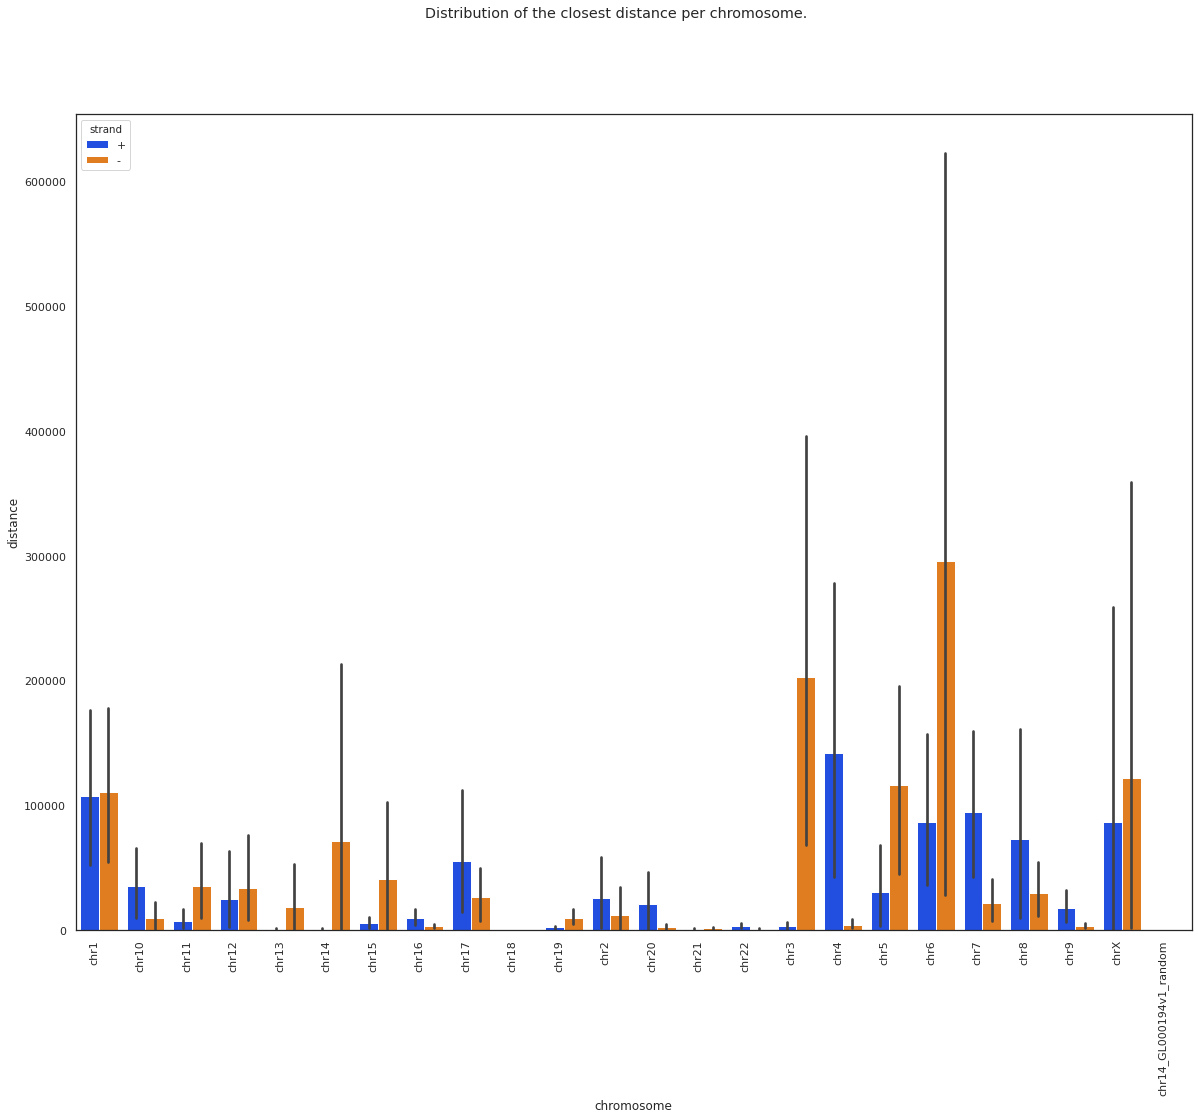

In [107]:
# Concatenate both dataframes into one.
df_pybed_both = pd.concat([df_pybed_plus, df_pybed_minus])

sns.set(style="white", palette="bright", color_codes=True)

# Hue is parameter to distinguish different set of values with different colors.
# In your case, you distinguish plus and minus strand.
chart = sns.barplot(
      x='chromosome', y='distance', data=df_pybed_both, hue='strand')

# You want to rotate the label by 90 degrees to fit them nicely under the plot.
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')

# Choose the title for the plot.
plt.suptitle("Distribution of the closest distance per chromosome.")

# Set the size of your plot.
plt.gcf().set_size_inches((20, 15))

# To find the answer to the inequality between the plus and minus strand graphs, you need to:

## I. Count of the rows to estimate how many reads there are for each chromosome on plus and minus strand.

In [0]:
# Use plus pandas dataframe to count the rows of the plus strand dataframe.
p = df_pandas_plus.set_index(["chromosome", "strand"]).count(level="chromosome")

In [0]:
# Use minus pandas dataframe to count the rows of the minus strand dataframe.
m = df_pandas_minus.set_index(["chromosome", "strand"]).count(level="chromosome")

In [0]:
# Merge plus and minus pandas dataframe into one.
dataframe_both = p.merge(m, on='chromosome', suffixes=('_plus','_minus'))

## II. Count the mean distance between chromosome reads on plus and minus strand.

In [111]:
# Determine the mean value of each of the plus strand distances for each chromosome.
import numpy as np
df_pandas_plus.distance = df_pandas_plus.distance.astype("int")
table_plus = pd.pivot_table(df_pandas_plus,index=['chromosome','strand'],values=["distance"],aggfunc=np.mean)
table_plus.head(10)

,,distance
chromosome,strand,
chr1,+,107521.592814
chr10,+,34945.088889
chr11,+,7250.326531
chr12,+,24782.886364
chr13,+,864.916667
chr14,+,945.156250
chr15,+,5293.696970
chr16,+,9162.222930
chr17,+,54920.106061


In [112]:
# Determine the mean value of each of the minus strand distances for each chromosome.
df_pandas_minus.distance = df_pandas_minus.distance.astype("int")
table_minus = pd.pivot_table(df_pandas_minus,index=['chromosome','strand'],values=["distance"],aggfunc=np.mean)
table_minus.head(10)

,,distance
chromosome,strand,
chr1,-,110397.240964
chr10,-,9745.640449
chr11,-,35022.198020
chr12,-,33618.285714
chr13,-,18509.800000
chr14,-,71531.258065
chr14_GL000194v1_random,-,142.000000
chr15,-,41102.555556
chr16,-,2937.651822


In [0]:
# Merge plus and minus table into one.
table_both = table_plus.merge(table_minus, on='chromosome', suffixes=('_plus','_minus'))

## III. Merge the table with reads count and the table with mean distances.

In [114]:
# Merge the plus and minus reads count table together with mean distances.
table_all_info = dataframe_both.merge(table_both, on='chromosome')
table_all_info.columns=['+', '-', '+_avg_dist', '-_avg_dist']
table_all_info.head(10)

,+,-,+_avg_dist,-_avg_dist
chromosome,,,,
chr1,167,166,107521.592814,110397.240964
chr10,45,89,34945.088889,9745.640449
chr11,196,101,7250.326531,35022.198020
chr12,44,42,24782.886364,33618.285714
chr13,36,5,864.916667,18509.800000
chr14,32,31,945.156250,71531.258065
chr15,33,27,5293.696970,41102.555556
chr16,314,247,9162.222930,2937.651822
chr17,66,91,54920.106061,26080.846154


## IV. Plot the obtained data into barplot.

1) Plot the count of reads to barplot.

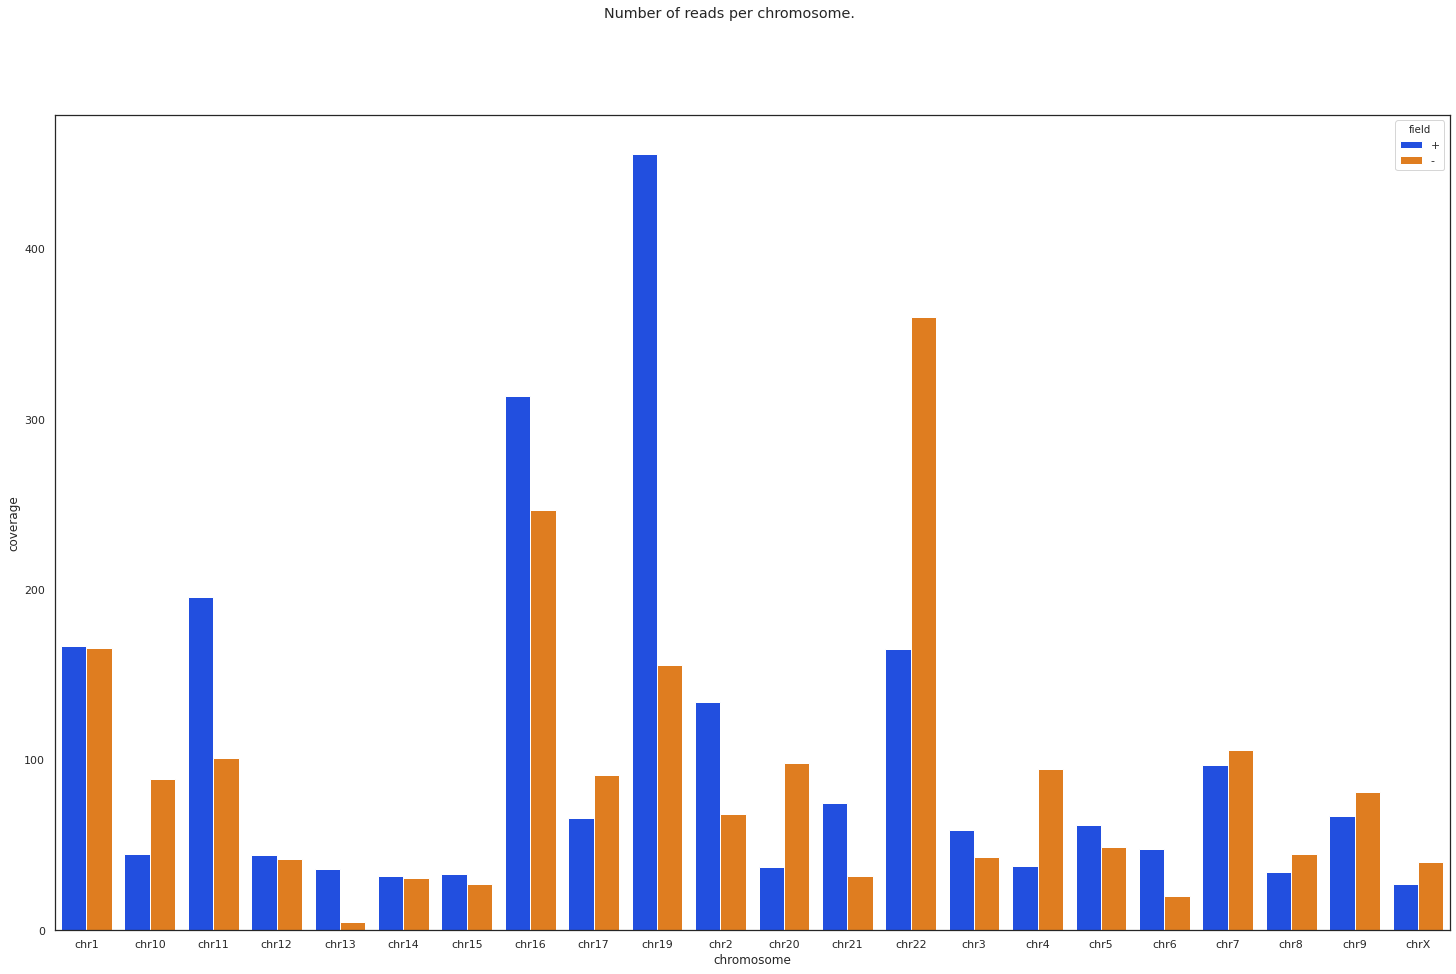

In [115]:
# Plot the plus and minus reads count into barplot.
import seaborn as sns
import matplotlib.pyplot as plt

# Use the index chromosome to create a new column chromosome.
table_all_info['chromosome'] = table_all_info.index

# Chromosome = column used as identifier variables. Variable name is field where
# are all of the columns except from chromosome. Value name are all the numeric
# data.
df = table_all_info.melt(id_vars='chromosome', var_name='field', value_name='coverage')

sns.set(style="white", palette="bright", color_codes=True)

# On x axis you put chromosome names, on y you put your numeric data - pick up
# plus and minus column where count of reads are stored. Hue distinguishes the
# two different fields = strands in different colors.
sns.barplot(x='chromosome', y='coverage', data=df[df.field.isin(['+', '-'])], hue='field')

# Choose a title for you plot.
plt.suptitle("Number of reads per chromosome.")

# Resize the plot.
plt.gcf().set_size_inches((25, 15))

2) Plot the average distances to barplot.

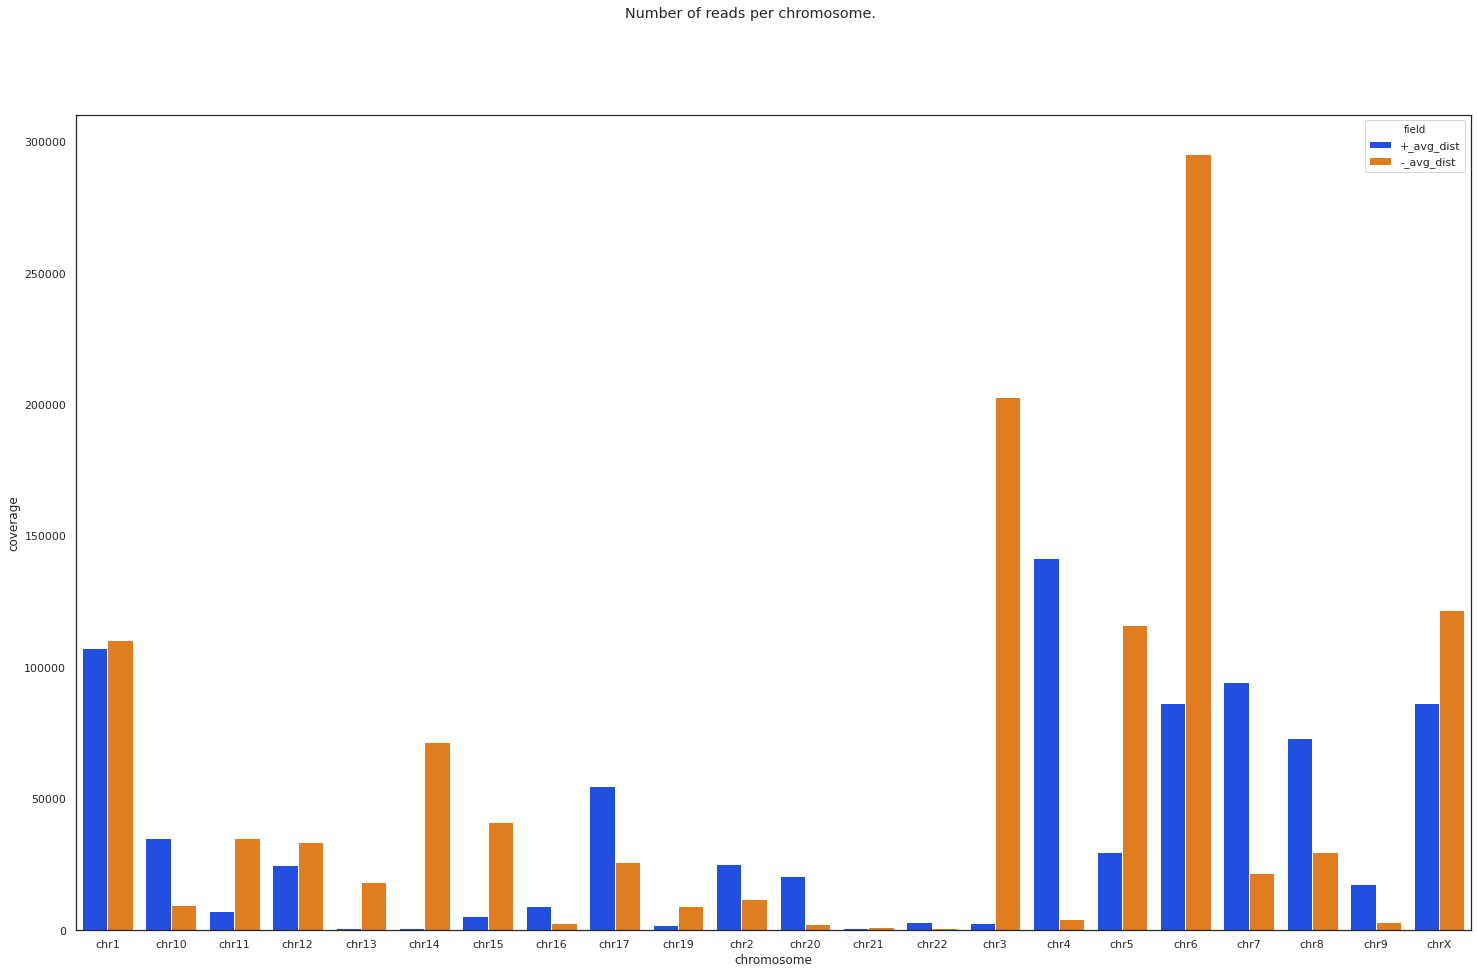

In [116]:
# Plot the average distances into barplot.
import seaborn as sns
import matplotlib.pyplot as plt

# Use the index chromosome to create a new column chromosome.
table_all_info['chromosome'] = table_all_info.index

# Chromosome = column used as identifier variables. Variable name is field where
# are all of the columns except from chromosome. Value name are all the numeric
# data.
df = table_all_info.melt(id_vars='chromosome', var_name='field', value_name='coverage')

sns.set(style="white", palette="bright", color_codes=True)

# On x axis you put chromosome names, on y you put your numeric data - pick up
# plus average distance and minus average distance column where count of reads 
# are stored. Hue distinguishes the wo different fields = strands in different colors.
sns.barplot(x='chromosome', y='coverage', data=df[df.field.isin(['+_avg_dist', '-_avg_dist'])], hue='field')

# Choose a title for you plot.
plt.suptitle("Number of reads per chromosome.")

# Resize the plot.
plt.gcf().set_size_inches((25, 15))

# Plot the distribution of the closest distances between the randomly permutated reads.

## I. Download the BED file. 

Define a function for BED file reading.

In [117]:
# Import get and decompress functions which you will need for the BED reader function.
from requests import get
from gzip import decompress

# Define a function that will download the compressed (gz) BED file,
# and it will decompress it to text.
# Helper function get_gzipped_bed_ is inside the main bed_reader function.
def bed_reader(target_url, output_name):
  def get_gzipped_bed_(target_url):
    downloaded_bed = get(target_url).content
    decompressed_bed = decompress(downloaded_bed)
    return decompressed_bed
  decompressed = get_gzipped_bed_(target_url)
  bed_file_human_readable = decompressed.decode()
  # Write bed file to new file on the disk
  output_file = open(output_name, "w")
  output_file.write(bed_file_human_readable)
  output_file.close()
  return output_name

# Call the outer function and provide it with two arguments - url and arbitrary 
# output name.
bed_reader("https://www.encodeproject.org/files/ENCFF861KMV/@@download/ENCFF861KMV.bed.gz", 
           "ENCFF861KMV.bed")

'ENCFF861KMV.bed'

## II. Create random permutations of features along the genome.

In [0]:
bedfile = pybedtools.bedtool.BedTool('ENCFF861KMV.bed')
seed = 13 # Seed is arbitrary but keep always the same number for
# the reproducibility of the experiment.
shuffled_bedfile = bedfile.shuffle(genome='hg19', chrom=True, seed=seed)

## III. Sort the rearranged BED file.

In [0]:
shuffled_sorted = shuffled_bedfile.sort()

## IV. Create a dictionary with the reoreded reads separated by strand.

In [0]:
# Create an empty dictionary. 
dict_r_shuffled_pybed = {}
# Open sorted BED file.
with open(shuffled_sorted.fn, "r") as text:
  # Read the content line by line.
  for line in text.readlines():
    # Define column, chrom_name, start, end, and strand.
    column = line.strip().split("\t")
    chrom_name = column[0]
    start = int(column[1])
    end = int(column[2])
    strand = column[5]
    # If the chromosome name exists in the dictionary already,
    # put the strand inside without creating a new dictionary
    # with the same chromosome name.
    if chrom_name in dict_r_shuffled_pybed:
      # If the dictionary strand already exists in the dictionary 
      # chromosome name, put the end/start inside without creating
      # a new strand key.
      if strand in dict_r_shuffled_pybed[chrom_name]:
        # In case of the plus strand, append end coordinate to the list where 
        #the 5' end (head) occurs.
        if strand == "+":
          dict_r_shuffled_pybed[chrom_name][strand].append(start) 
        # If the strand is minus, append start to the list,
        # the reason being that minus strand is in reversed
        # order - start coordinate presents the 5' end (head).
        else:
          dict_r_shuffled_pybed[chrom_name][strand].append(end)
      # If the strand does not yet exist in
      # the chromosome name dictionary, it is
      # created and a list is created inside.
      else:
        dict_r_shuffled_pybed[chrom_name][strand] = []
        # To fill the new strand dictionary,
        # you need to provide also the code for strand dictionary
        # creation, the +/- keey, and the end/start coordinates
        # inside the list.
        if strand == "+":
          dict_r_shuffled_pybed[chrom_name][strand].append(start) 
        else:
          dict_r_shuffled_pybed[chrom_name][strand].append(end)
    # If the chromosome name is not yet in the dictionary, 
    #create it.
    else:
      # Create a new dictionary inside the chromosome name
      # dictionary.
      dict_r_shuffled_pybed[chrom_name] = {}
      # To fill the new "chrom_name" dictionary, you need to 
      # provide also the code for strand dictionary
      # creation, the +/- key, and the end/start coordinates
      # inside the list.
      # The key of this dictionary is strand and the value
      # is a new list.
      dict_r_shuffled_pybed[chrom_name][strand] = []
      # If the strand is plus, append end to the list.
      if strand == "+":
        dict_r_shuffled_pybed[chrom_name][strand].append(start) 
      # If the strand is minus, append start to the list.
      else:
        dict_r_shuffled_pybed[chrom_name][strand].append(end)

#print(dict_r_shuffled_pybed) # Printing the dictionary with reads.

## V. Create a dictionary with the closest distances between the permutated reads without outliers.

Note: Consider the distance between start/end coordinate and its neighbors both on the right and on the left side.

For example, your coordinates are: 5, 20, 18. 
Your start coordinate position is 20, its left neighbor is 5, its right neigbor is 18.

> current_start_pos - left_start_neigh 

> 20 - 5 = 15 = |15|

> right_start_neigh - current_start_pos

> 18 - 20 = -2 = |2|

Absolute value of 15 is larger than absolute value of 2, therefore you will add 2 in your dictionary.

To exclude the outliers from the dictionary of distances, you need to compare the distance between the absolute value of the currently investigated number to the absolute value of the previous number. Subsequently, you need to also compare the absolute value of the currently investigated number to the absolute value of the next number. Add to the dictionary of closest distances either the previous or the next number based on whichever of the said distances is smaller.

In [0]:
dict_clos_shuffled_pybed = {}
# For each chromosome in the dictionary of distance create a chrom_name in the new
# dictionary of the closest distances. Simultaneously, the lists for the plus
# and for the minus strand will be created as explained above.
for chrom_name in dict_r_shuffled_pybed:
  dict_clos_shuffled_pybed[chrom_name] = {"+" : list(), "-" : list()}
  for strand in dict_r_shuffled_pybed[chrom_name]:
    if strand == "+":
      try:
        for dist_start in range(0,len(dict_r_shuffled_pybed[chrom_name][strand])):
          # This time, you need to compare the distance between the current
          # position and the next one with the distance between the current
          # position and the previous one. Whichever is closer will be put
          # to the dictionary.
          current_start_pos = dict_r_shuffled_pybed[chrom_name][strand][dist_start]
          right_start_neigh = dict_r_shuffled_pybed[chrom_name][strand][dist_start+1]          
          left_start_neigh = dict_r_shuffled_pybed[chrom_name][strand][dist_start-1]    
          dist1 = current_start_pos - left_start_neigh 
          dist1 = abs(dist1)    
          dist2 = right_start_neigh - current_start_pos    
          dist2 = abs(dist2)  
          if dist1 < dist2:
            dict_clos_shuffled_pybed[chrom_name][strand].append(left_start_neigh)
          else:
            dict_clos_shuffled_pybed[chrom_name][strand].append(right_start_neigh)
      except IndexError:
        "null" 
      
    else:
      try:
        for dist_end in range(0,len(dict_r_shuffled_pybed[chrom_name][strand])): 
          current_end_pos = dict_r_shuffled_pybed[chrom_name][strand][dist_end]
          right_end_neigh = dict_r_shuffled_pybed[chrom_name][strand][dist_end+1]          
          left_end_neigh = dict_r_shuffled_pybed[chrom_name][strand][dist_end-1]    
          dist1 = current_end_pos - left_end_neigh    
          dist1 = abs(dist1)    
          dist2 = right_end_neigh - current_end_pos    
          dist2 = abs(dist2)           
          if dist1 < dist2:
            dict_clos_shuffled_pybed[chrom_name][strand].append(left_end_neigh)
          else:
            dict_clos_shuffled_pybed[chrom_name][strand].append(right_end_neigh)
      except IndexError:
        "null" 

# print(dict_r_shuffled_pybed) # Printing the dictionary with the distance 
# between reads.       
#print(dict_clos_shuffled_pybed) # Printing the dictionary with the closest 
# distance between reads.   

To be sure you got rid of all of the outliers, count z-score to determine the relationship of each value to the mean of a group of values. Set an arbitrary threshold to filter values that are distant from the mean.

In [122]:
from scipy import stats
import numpy as np

dict_no_outliers_shuffled_pybed = {}

# Only chrom_name key.
for chrom_name in dict_clos_shuffled_pybed.keys():
  # Plus and minus strand are manually written.
  list_plus_input = dict_clos_shuffled_pybed[chrom_name]['+']
  list_minus_input = dict_clos_shuffled_pybed[chrom_name]['-']
  # get a zscore for list_plus_input
  zscore_plus = stats.zscore(list_plus_input, ddof=0)
  # doo the same foor minus strand
  zscore_minus = stats.zscore(list_minus_input, ddof=0)

  if len(list_plus_input) > 0:
    for z, distance in zip(zscore_plus, list_plus_input):
      if z < 1:
        if chrom_name in dict_no_outliers_shuffled_pybed:
          if "+" in dict_no_outliers_shuffled_pybed[chrom_name]:
            dict_no_outliers_shuffled_pybed[chrom_name]["+"].append(distance)
          
          else:
            dict_no_outliers_shuffled_pybed[chrom_name]["+"] = []
            dict_no_outliers_shuffled_pybed[chrom_name]["+"].append(distance)

        else:
          dict_no_outliers_shuffled_pybed[chrom_name] = {}
          dict_no_outliers_shuffled_pybed[chrom_name]["+"] = []
          dict_no_outliers_shuffled_pybed[chrom_name]["+"].append(distance)

  if len(list_minus_input)  > 0:
    for z, distance in zip(zscore_minus, list_minus_input):
      if z < 1:
        if chrom_name in dict_no_outliers_shuffled_pybed:
          if "-" in dict_no_outliers_shuffled_pybed[chrom_name]:
            dict_no_outliers_shuffled_pybed[chrom_name]["-"].append(distance)
          
          else:
            dict_no_outliers_shuffled_pybed[chrom_name]["-"] = []
            dict_no_outliers_shuffled_pybed[chrom_name]["-"].append(distance)

        else:
          dict_no_outliers_shuffled_pybed[chrom_name] = {}
          dict_no_outliers_shuffled_pybed[chrom_name]["-"] = []
          dict_no_outliers_shuffled_pybed[chrom_name]["-"].append(distance)

  # loop over the two lists and remove outliers
  # you can also use an array
  
# print(dict_no_outliers_shuffled_pybed) # Printing the dictionary with no outliers.

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:2416: RuntimeWarning: Mean of empty slice.
  mns = a.mean(axis=axis, keepdims=True)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:207: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


To compare the graphs before applying z-score filtering and afterwards. You can see that graph after the filtering are rid of outlying values.

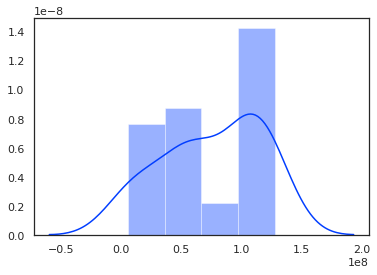

In [123]:
import seaborn as sns
sns.distplot(a=dict_clos_shuffled_pybed[chrom_name]["+"])

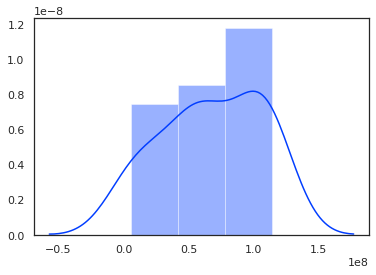

In [124]:
import seaborn as sns
sns.distplot(a=dict_no_outliers_shuffled_pybed[chrom_name]["+"])

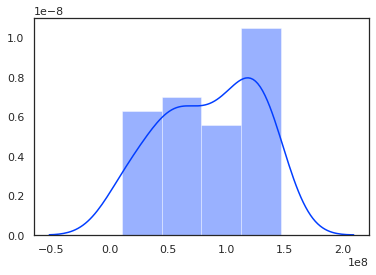

In [125]:
import seaborn as sns
sns.distplot(a=dict_clos_shuffled_pybed[chrom_name]["-"])

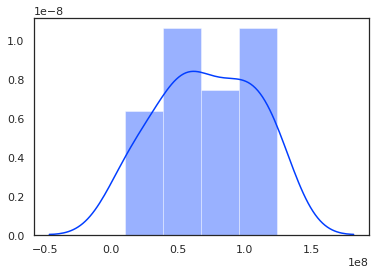

In [126]:
import seaborn as sns
sns.distplot(a=dict_no_outliers_shuffled_pybed[chrom_name]["-"])

## VI. Plot the distribution of the closest head to head distance without outliers between the permutated reads.

1) To plot the data from the dictionary, you need to convert the dictionary into
dataframe. 

In [127]:
import pandas as pd

# Create an empty list.
list_pybed_shuffled_plus = list()
list_pybed_shuffled_min = list()
# Loop over the chromosome names in the dictionary. 
for chrom_name in dict_no_outliers_shuffled_pybed:
  # Create a temporary dictionary with the strands.
  dict_no_outliers_pybed_shuffled_tmp = dict_no_outliers_shuffled_pybed[chrom_name]
  # Loop over strands in the temporary dictionary.
  for strand in dict_no_outliers_pybed_shuffled_tmp:
    if strand == "+":
    # Define the distance.
      distance = dict_no_outliers_pybed_shuffled_tmp[strand]
    # Create a pandas daraframe with following columns:
    # distance, strand, and chromosome. 
      dict_pybed_shuffled_plus = pd.DataFrame(distance, columns=["distance"])
      dict_pybed_shuffled_plus["strand"] = strand
      dict_pybed_shuffled_plus["chromosome"] = chrom_name
    # Append all of the dataframes from the temporary dictionary
    # to the list.
      list_pybed_shuffled_plus.append(dict_pybed_shuffled_plus)
    else:
      distance = dict_no_outliers_pybed_shuffled_tmp[strand]
    # Create a pandas daraframe with following columns:
    # distance, strand, and chromosome. 
      dict_pybed_shuffled_min = pd.DataFrame(distance, columns=["distance"])
      dict_pybed_shuffled_min["strand"] = strand 
      dict_pybed_shuffled_min["chromosome"] = chrom_name
    # Append all of the dataframes from the temporary dictionary
    # to the list.
      list_pybed_shuffled_min.append(dict_pybed_shuffled_min)

# You need to concatenate the list of dataframes into a new dataframe.    
df_pybed_shuffled_plus = pd.concat(list_pybed_shuffled_plus)
df_pybed_shuffled_minus = pd.concat(list_pybed_shuffled_min)
print(df_pybed_shuffled_plus)
print(df_pybed_shuffled_minus)
# Each column is a Pandas series.

     distance strand chromosome
0     2251261      +       chr1
1     2569643      +       chr1
2     2251261      +       chr1
3     2569643      +       chr1
4     5507698      +       chr1
..        ...    ...        ...
21  112302345      +       chrX
22  113377384      +       chrX
23  113792181      +       chrX
24  113377384      +       chrX
25  113792181      +       chrX

[1835 rows x 3 columns]
     distance strand chromosome
0     2113408      -       chr1
1     1714028      -       chr1
2     4043660      -       chr1
3     3382526      -       chr1
4     6596442      -       chr1
..        ...    ...        ...
28  119615477      -       chrX
29  119242630      -       chrX
30  119615477      -       chrX
31  124675039      -       chrX
32  124403579      -       chrX

[1655 rows x 3 columns]


2) Plot barplot with the distribution of the closest distances.

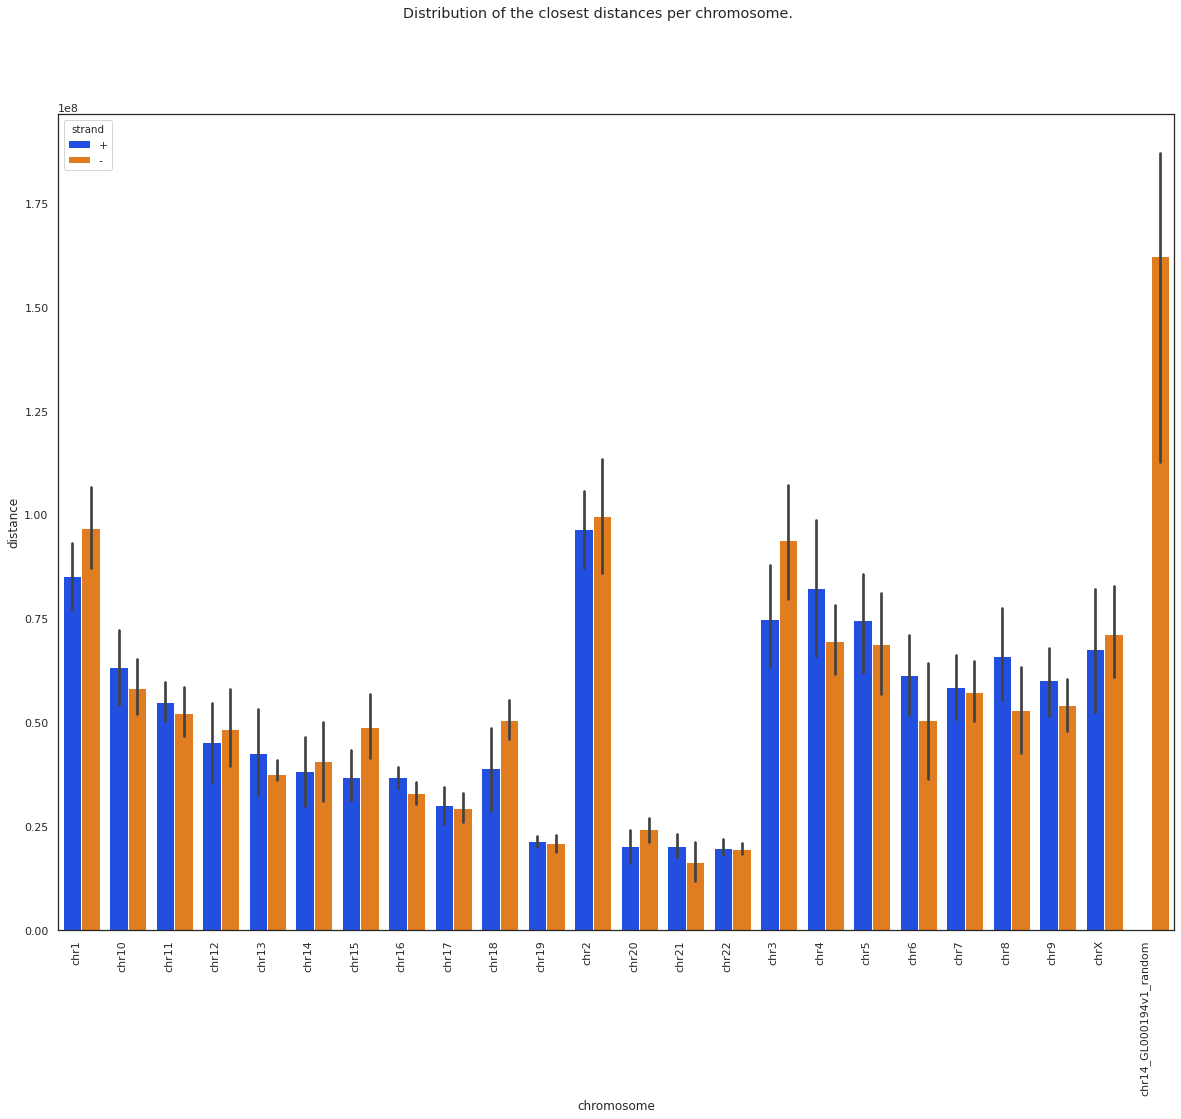

In [128]:
# Concatenate both dataframes into one.
df_pybed_shuffled_both = pd.concat( [df_pybed_shuffled_plus, df_pybed_shuffled_minus] )

sns.set(style="white", palette="bright", color_codes=True)

# Hue is parameter to distinguish different set of values with different colors.
# In your case, you distinguish plus and minus strand.
chart = sns.barplot(
      x='chromosome', y='distance', data=df_pybed_shuffled_both, hue='strand')

# You want to rotate the label by 90 degrees to fit them nicely under the plot.
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')

# Choose the title for the plot.
plt.suptitle("Distribution of the closest distances per chromosome.")
 
# Set the size of your plot.
plt.gcf().set_size_inches((20, 15))

# To decipher the inequality between the plus and minus strand graphs of the permutated reads, you need to:

##I. Count of the rows to estimate how many reordered reads there are for each chromosome on plus and minus strand.

In [0]:
# Count the rows of the plus strand dataframe.
p_shuffled = df_pybed_shuffled_plus.set_index(["chromosome", "strand"]).count(level="chromosome")

In [0]:
# Count the rows of the minus strand dataframe.
m_shuffled = df_pybed_shuffled_minus.set_index(["chromosome", "strand"]).count(level="chromosome")

In [0]:
# Merge plus and minus strand dataframe together.
dataframe_shuffled_both = p_shuffled.merge(m_shuffled, on='chromosome', suffixes=('_plus','_minus'))

## II. Count the mean distance between rearranged reads on plus and minus strand.

In [132]:
# Determine the mean value of each of the plus strand distances for each chromosome.
df_pybed_shuffled_plus.distance = df_pybed_shuffled_plus.distance.astype('int')
table_shuffled_plus = pd.pivot_table(df_pybed_shuffled_plus,index=['chromosome','strand'],values=["distance"],aggfunc=np.mean)
table_shuffled_plus.head(10)

,,distance
chromosome,strand,
chr1,+,8.514636e+07
chr10,+,6.321072e+07
chr11,+,5.481993e+07
chr12,+,4.521403e+07
chr13,+,4.264713e+07
chr14,+,3.822471e+07
chr15,+,3.681190e+07
chr16,+,3.677141e+07
chr17,+,3.006108e+07


In [133]:
# Determine the mean value of each of the minus strand distances for each chromosome.
df_pybed_shuffled_minus.distance = df_pybed_shuffled_minus.distance.astype('int')
table_shuffled_minus = pd.pivot_table(df_pybed_shuffled_minus,index=['chromosome','strand'],values=["distance"],aggfunc=np.mean)
table_shuffled_minus.head(10)

,,distance
chromosome,strand,
chr1,-,9.689235e+07
chr10,-,5.832688e+07
chr11,-,5.230203e+07
chr12,-,4.835464e+07
chr13,-,3.764703e+07
chr14,-,4.064132e+07
chr14_GL000194v1_random,-,1.622526e+08
chr15,-,4.887560e+07
chr16,-,3.303153e+07


In [134]:
# Merge the plus and minus table with mean distances together.
table_shuffled_both = table_shuffled_plus.merge(table_shuffled_minus, on='chromosome', suffixes=('_plus','_minus'))
table_shuffled_both.head(10)

,distance_plus,distance_minus
chromosome,,
chr1,8.514636e+07,9.689235e+07
chr10,6.321072e+07,5.832688e+07
chr11,5.481993e+07,5.230203e+07
chr12,4.521403e+07,4.835464e+07
chr13,4.264713e+07,3.764703e+07
chr14,3.822471e+07,4.064132e+07
chr15,3.681190e+07,4.887560e+07
chr16,3.677141e+07,3.303153e+07
chr17,3.006108e+07,2.930656e+07


## III. Merge the table with rearranged reads count and the table with mean distances.

In [135]:
# Merge the plus and minus reads count table together with mean distances.
table_shuffled_all_info = dataframe_shuffled_both.merge(table_shuffled_both, on='chromosome', suffixes=(' ',''))
table_shuffled_all_info.columns=['+', '-', '+_avg_dist', '-_avg_dist']
table_shuffled_all_info.head(10)

,+,-,+_avg_dist,-_avg_dist
chromosome,,,,
chr1,137,136,8.514636e+07,9.689235e+07
chr10,39,73,6.321072e+07,5.832688e+07
chr11,156,83,5.481993e+07,5.230203e+07
chr12,36,36,4.521403e+07,4.835464e+07
chr13,29,5,4.264713e+07,3.764703e+07
chr14,25,26,3.822471e+07,4.064132e+07
chr15,29,27,3.681190e+07,4.887560e+07
chr16,257,196,3.677141e+07,3.303153e+07
chr17,53,79,3.006108e+07,2.930656e+07


## IV. Plot the obtained data of the permutated reads into barplot.

1) Plot the count of reads to barplot.

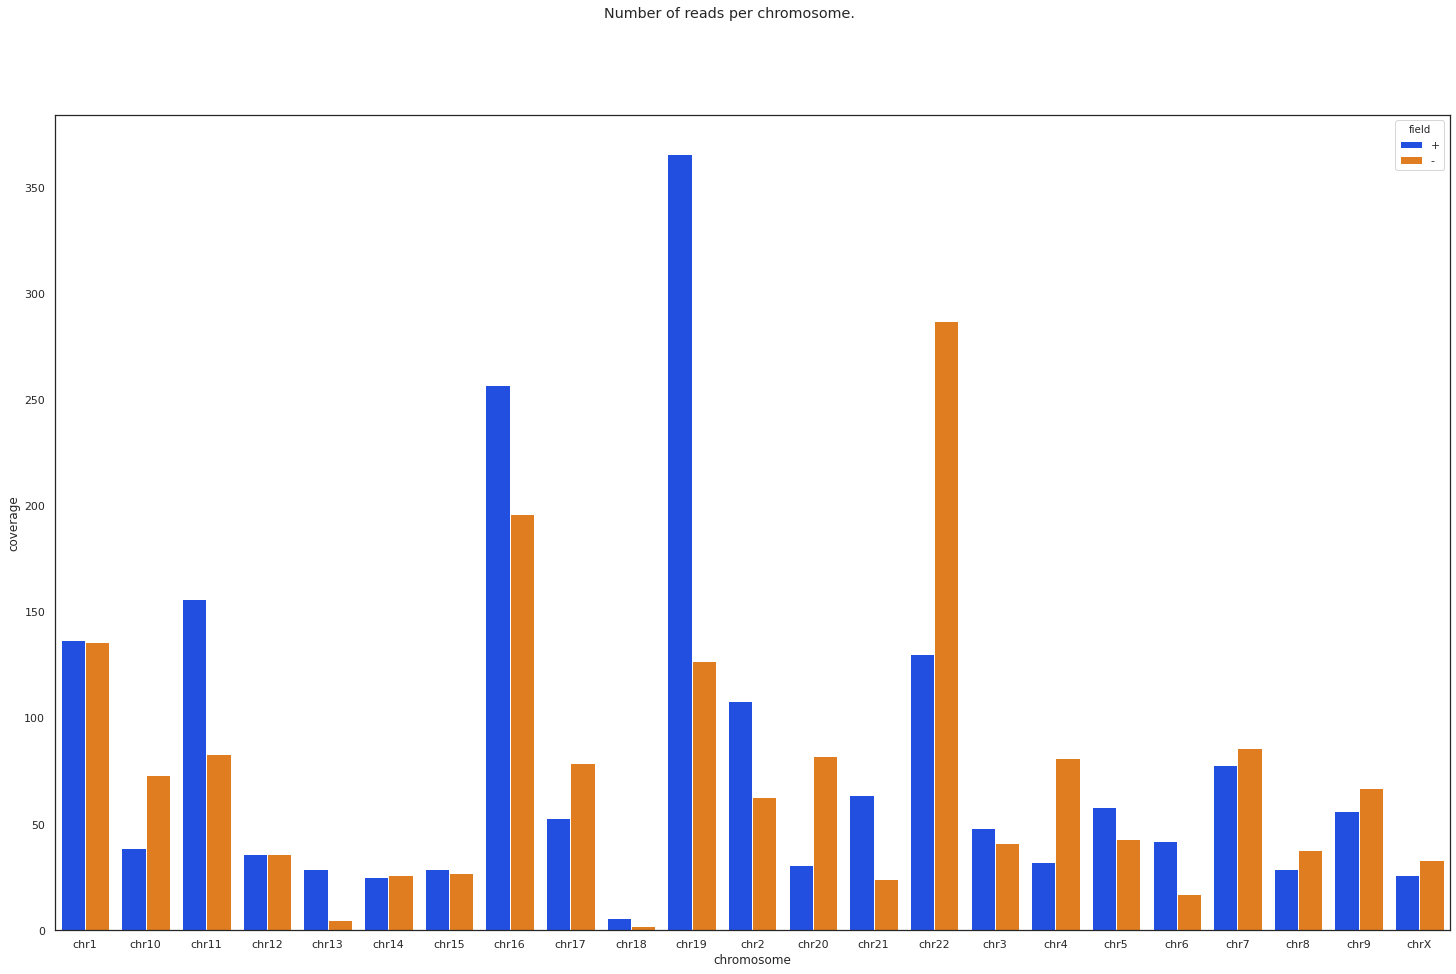

In [136]:
# Plot the plus and minus reads count table into barplot.
import seaborn as sns
import matplotlib.pyplot as plt

# Use the index chromosome to create a new column chromosome.
table_shuffled_all_info['chromosome'] = table_shuffled_all_info.index

# Chromosome = column used as identifier variables. Variable name is field where
# are all of the columns except from chromosome. Value name are all the numeric
# data.
df = table_shuffled_all_info.melt(id_vars='chromosome', var_name='field', value_name='coverage')

sns.set(style="white", palette="bright", color_codes=True)

# On x axis you put chromosome names, on y you put your numeric data - pick up
# plus and minus column where count of reads are stored. Hue distinguishes the
# two different fields = strands in different colors.
sns.barplot(x='chromosome', y='coverage', data=df[df.field.isin(['+', '-'])], hue='field')

# Choose a title for you plot.
plt.suptitle("Number of reads per chromosome.")

# Resize the plot.
plt.gcf().set_size_inches((25, 15))

2) Plot the average distances to barplot.

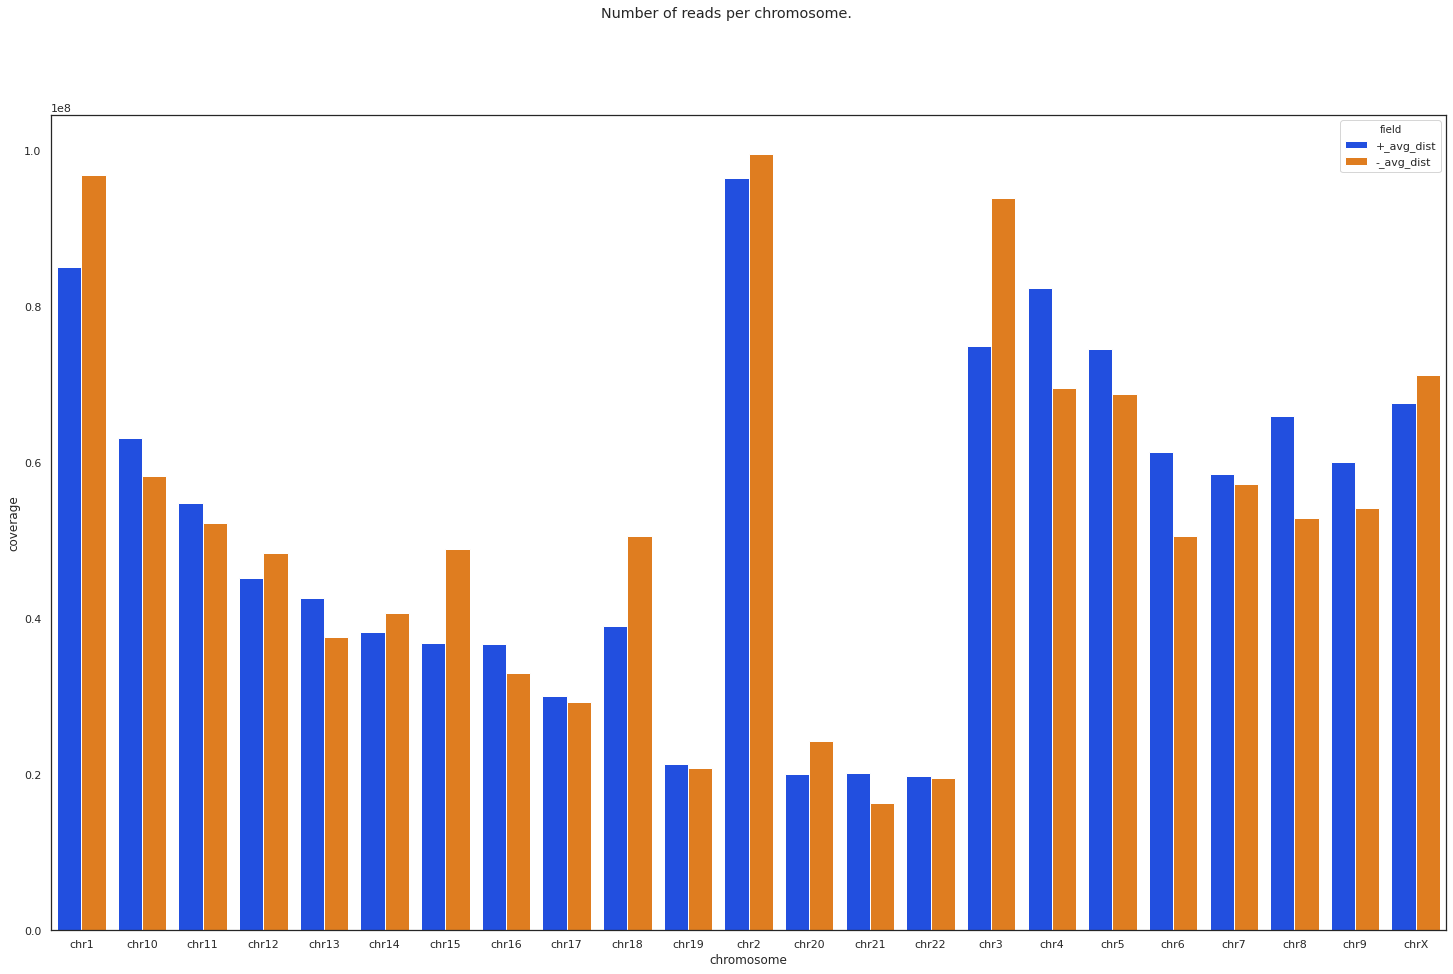

In [137]:
# Plot the average distances into barplot.
import seaborn as sns
import matplotlib.pyplot as plt

# Use the index chromosome to create a new column chromosome.
table_shuffled_all_info['chromosome'] = table_shuffled_all_info.index

# Chromosome = column used as identifier variables. Variable name is field where
# are all of the columns except from chromosome. Value name are all the numeric
# data.
df = table_shuffled_all_info.melt(id_vars='chromosome', var_name='field', value_name='coverage')
sns.set(style="white", palette="bright", color_codes=True)

# On x axis you put chromosome names, on y you put your numeric data - pick up
# plus and minus column where count of reads are stored. Hue distinguishes the
# two different fields = strands in different colors.
sns.barplot(x='chromosome', y='coverage', data=df[df.field.isin(['+_avg_dist', '-_avg_dist'])], hue='field')

# Choose a title for you plot.
plt.suptitle("Number of reads per chromosome.")

# Resize the plot.
plt.gcf().set_size_inches((25, 15))